## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sn

/home/anna/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
import pandas as pd

In [3]:
np.random.seed(123)

In [4]:
import keras

Using Theano backend.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [6]:
print(keras.__version__)

2.0.8


## Загружаем исходные данные

In [7]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [8]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [9]:
del train
del test

In [10]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

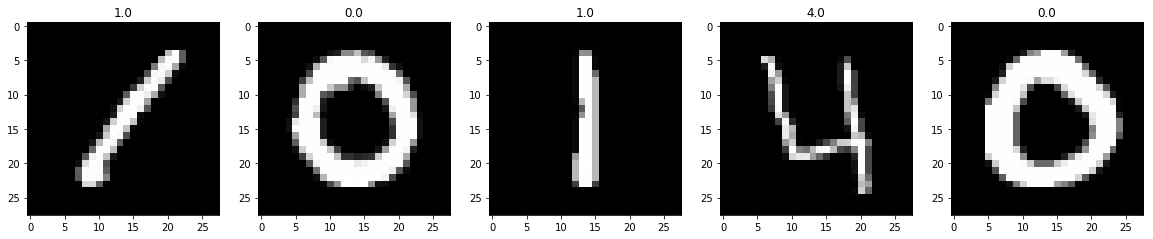

In [11]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [12]:
SZ=28

for i, img in enumerate(train_img):
    m=cv2.moments(img)
    skew = m['mu11']/m['mu02']
    #print ("skew: " + str(skew))
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img2 = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    train_img[i]=img2
    m2=cv2.moments(img2)
    skew2 = m2['mu11']/m2['mu02']
    #print ("skew2: " + str(skew2))

In [13]:
for i, img in enumerate(train_img):
    blur = cv2.GaussianBlur(img,(3,3),0)
    train_img[i]=blur

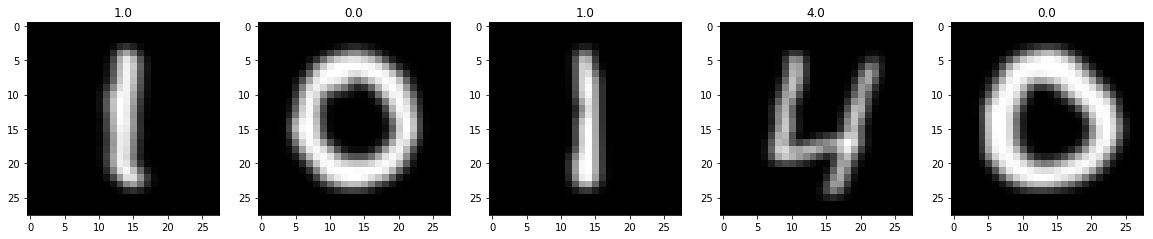

In [14]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5]):
    subplot = fig.add_subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i]);

In [15]:
SZ=28

for i, img in enumerate(test_img):
    m=cv2.moments(img)
    skew = m['mu11']/m['mu02']
    #print ("skew: " + str(skew))
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img2 = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    test_img[i]=img2
    m2=cv2.moments(img2)
    skew2 = m2['mu11']/m2['mu02']
    #print ("skew2: " + str(skew2))

In [16]:
for i, img in enumerate(test_img):
    blur = cv2.GaussianBlur(img,(3,3),0)
    test_img[i]=blur

In [17]:
train_img.shape

(42000, 28, 28)

In [18]:
test_img.shape

(28000, 28, 28)

## SPLIT DATA

In [19]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=123)

In [20]:
y_train_labels = np_utils.to_categorical(y_train)

In [21]:
print( y_train.shape, y_train_labels.shape, x_train.shape)

(33600,) (33600, 10) (33600, 28, 28)


## Model

In [24]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28) ))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/home/anna/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  
/home/anna/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ('The specified size contains a dimension with value <= 0', (-768, 128))

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, 
          batch_size=32, epochs=10, verbose=1)

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (33600, 28, 28)

## Get Results

In [64]:
np.savetxt('results.csv', 
           np.c_[range(1,len(transform_test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

# Kaggle score 0.98228